# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.
<p>Описание данных</p>
<p>Технологический процесс</p>
<p>Rougher feed — исходное сырье</p>
<p>Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
<p>Xanthate **— ксантогенат (промотер, или активатор флотации);</p>
<p>Sulphate — сульфат (на данном производстве сульфид натрия);</p>
<p>Depressant — депрессант (силикат натрия).</p>
<p>Rougher process (англ. «грубый процесс») — флотация</p>
<p>Rougher tails — отвальные хвосты</p>
<p>Float banks — флотационная установка</p>
<p>Cleaner process — очистка</p>
<p>Rougher Au — черновой концентрат золота</p>
<p>Final Au — финальный концентрат золота</p>
<p>Параметры этапов</p>
<p>air amount — объём воздуха</p>
<p>fluid levels — уровень жидкости</p>
<p>feed size — размер гранул сырья</p>
<p>feed rate — скорость подачи</p>
<p>Наименование признаков</p>
<p>Наименование признаков должно быть такое:</p>
<p>[этап].[тип_параметра].[название_параметра]</p>
<p>Пример: rougher.input.feed_ag</p>
<p>Возможные значения для блока [этап]:</p>
<p>rougher — флотация</p>
<p>primary_cleaner — первичная очистка</p>
<p>secondary_cleaner — вторичная очистка</p>
<p>final — финальные характеристики</p>
<p>Возможные значения для блока [тип_параметра]:</p>
<p>input — параметры сырья</p>
<p>output — параметры продукта</p>
<p>state — параметры, характеризующие текущее состояние этапа</p>
<p>calculation — расчётные характеристики</p>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Добавляем необходимые библиотеки и инструменты, убираем предупреждения об ошибках.

In [3]:
def data_read_glance(file_path):# создаем функцию для загрузки данных и первичного анализа. На вход принимает путь до файла.
    data = pd.read_csv(file_path, parse_dates = ['date'])
    print(data.info())
    print('Данные о наличии дубликатов', data.duplicated().value_counts(),'\n')
    return data
#df_full = data_read_glance('C:/Users/VovAz/Desktop/Проект/Сборный проект-2/gold_recovery_full_new.csv')


In [4]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full= pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df_train = data_read_glance('C:/Users/VovAz/Desktop/Проект/Сборный проект-2/gold_recovery_train_new.csv')

In [4]:
df_test = data_read_glance('C:/Users/VovAz/Desktop/Проект/Сборный проект-2/gold_recovery_test_new.csv')

Проводим первичный анализ данных, типы данных соотвестсвует описанию, привели тип obj к типу datetime

In [5]:
def mineral_preparation_efficiency(data):# пишем функцию для расчета эффективности обогащения, на вход принимает датафрейм
    F = data["rougher.input.feed_au"]
    C = data["rougher.output.concentrate_au"]
    T = data["rougher.output.tail_au"]
    recovery = (C * (F - T)) / (F  * (C - T)) * 100
    return recovery
test_recovery = df_train.apply(mineral_preparation_efficiency, axis = 1)
mae = mean_absolute_error(df_train['rougher.output.recovery'], test_recovery)
print('Значение МАЕ между фактическим и расчетным значением:', mae)

Значение МАЕ между фактическим и расчетным значением: 9.682896147825551e-15


Ошибка между расчетным и фактическим значением стремится к нулю, значит данные предоставлены верные.

In [6]:
miss_columns = []
for i in df_train.columns:
    if i not in df_test.columns:
        miss_columns.append(i)# создаем список из пропущенных в тестовой выборке столбцов
print('Количество пропущенных признаков в тестовой выборке:', len(miss_columns))
miss_columns

Количество пропущенных признаков в тестовой выборке: 34


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Отмечаем, что из 34 пропущенных признака 30 относятся к параметрам продукта и только 4 к расчетным характеристикам

9 пропущенных признаков этапа final, 8 primary_cleaner, 9 rougher, 4 secondary_cleaner относятся к параметрам продукта 4 пропущенных признака этапа rougher относятся к расчетным характеристикам На всех этапах отсутствует информация о хвостовых частях. Во всех этапах, кроме повторной очистки отсутствует информация о доле металлов. У финального этапа и этапа флотации отсутствуют признаки обогащения. Так же отсутствуют данные о некоторых реагентах на этапе флотации

In [7]:
df_train = df_train.sort_values('date', ascending=True)
df_train = df_train.fillna(method="ffill")
df_test = df_test.sort_values('date', ascending=True)
df_test = df_test.fillna(method="ffill")
df_full = df_full.sort_values('date', ascending=True)
df_full = df_full.fillna(method="ffill")


Поскольку, по условиям задачи, процессы происходящие в примерно одинаковые периоды времени должны быть похожими по характеристикам, заполняем пропуски методом ffill. Хотя данные должны быть расположены в порядке возрастания по параметру date, убедимся с помощью sort_values.

## Анализ данных

In [8]:
print('Концентрация до флотации')
print('Концентрация Серебра:{: 0.2f}, Свинца:{: 0.2f}, Золота:{: 0.2f}'.
format(df_full['rougher.input.feed_ag'].mean(),
df_full['rougher.input.feed_pb'].mean(),
df_full['rougher.input.feed_au'].mean()),'\n')
print('Концентрация после флотации')
print('Коцентрация Серебра:{: 0.2f}, Свинца:{: 0.2f}, Золота:{: 0.2f}'.
format(df_full['rougher.output.concentrate_ag'].mean(),
df_full['rougher.output.concentrate_pb'].mean(),
df_full['rougher.output.concentrate_au'].mean()), '\n')
print('Концентрация после первичной очистки')
print('Концентрация Серебра:{: 0.2f}, Свинца:{: 0.2f}, Золота:{: 0.2f}'.
format(df_full['primary_cleaner.output.concentrate_ag'].mean(),
df_full['primary_cleaner.output.concentrate_pb'].mean(),
df_full['primary_cleaner.output.concentrate_au'].mean()), '\n')
print('Концентрация после финальной очистки')
print('Концентрация Серебра:{: 0.2f}, Свинца:{: 0.2f}, Золота:{: 0.2f}'.
format(df_full['final.output.concentrate_ag'].mean(),
df_full['final.output.concentrate_pb'].mean(),
df_full['final.output.concentrate_au'].mean()), '\n')

Концентрация до флотации
Концентрация Серебра: 8.79, Свинца: 3.59, Золота: 8.27 

Концентрация после флотации
Коцентрация Серебра: 11.99, Свинца: 7.61, Золота: 19.77 

Концентрация после первичной очистки
Концентрация Серебра: 8.44, Свинца: 9.81, Золота: 32.12 

Концентрация после финальной очистки
Концентрация Серебра: 5.17, Свинца: 9.98, Золота: 44.08 



Наблюдаем, что после флотации повышается общее количество серебра, свинца и золота увеличиваются, после первичной и финальной очистки доля серебра уменьшается, свинца - незначительно увеличивается, золота - увеличивается значительно.

In [9]:
print(df_test['rougher.input.feed_size'].describe())
print(df_train['rougher.input.feed_size'].describe())

count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64
count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64


Проводим сравениепоказателей сырья для тестовой и обучающей выборки. В целом, показатели отличаются незначитльно, разница может быть вызвана разницей в размерах выборки. Проведем более подробный анализ.

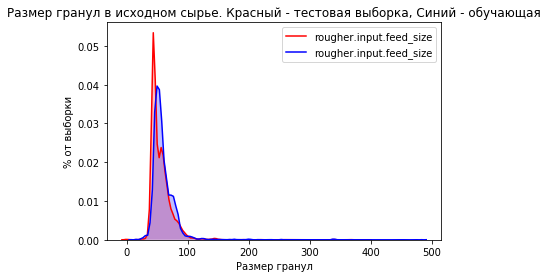

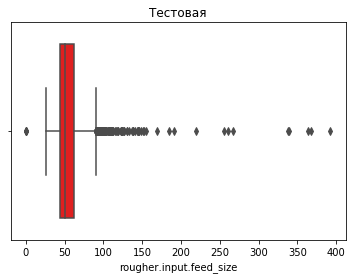

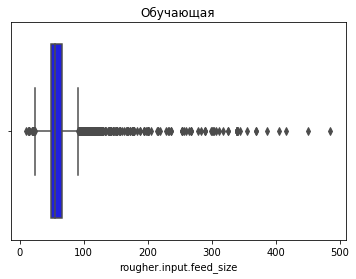

Размер гранул в гистограмме с квантилем от 0.01 до 0.99


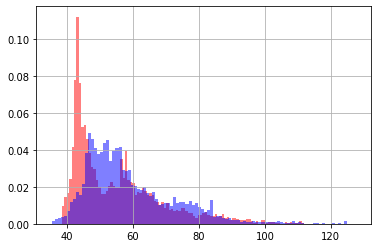

Размер гранул в полной выборке


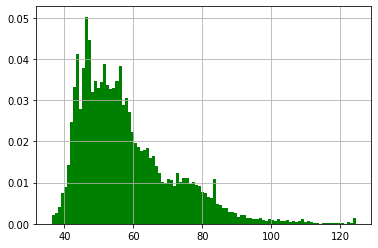

In [10]:
fig = sns.kdeplot(df_test['rougher.input.feed_size'], shade=True, color="r")
fig = sns.kdeplot(df_train['rougher.input.feed_size'], shade=True, color="b").set(title='Размер гранул в исходном сырье. Красный - тестовая выборка, Синий - обучающая',
                                                                  xlabel='Размер гранул',
                                                                  ylabel='% от выборки')
plt.show()
sns.boxplot(df_test['rougher.input.feed_size'], color = "r").set(title = 'Тестовая')
plt.show()
sns.boxplot(df_train['rougher.input.feed_size'], color = "b").set(title = 'Обучающая')
plt.show()
print('Размер гранул в гистограмме с квантилем от 0.01 до 0.99')
df_test['rougher.input.feed_size'].hist( range = (df_test['rougher.input.feed_size'].quantile(.01), df_test['rougher.input.feed_size'].quantile(.99)), bins = 100, alpha = 0.5, density = True,color = 'r')
df_train['rougher.input.feed_size'].hist( range = (df_train['rougher.input.feed_size'].quantile(.01), df_train['rougher.input.feed_size'].quantile(.99)), bins = 100, alpha = 0.5, density = True,color = 'b')
plt.show()
print('Размер гранул в полной выборке')
df_full['rougher.input.feed_size'].hist( range = (df_full['rougher.input.feed_size'].quantile(.01), df_full['rougher.input.feed_size'].quantile(.99)), bins = 100, density = True,color = 'g')
plt.show()


Размер гранул в обучающей и тестовой выборке должен быть одинаковым. Тестовая выборка показывает пик в районе 43, обучающая выборка распределна равномерно между 40 и 60. Такой пик может быть связан с меньшим количеством данных. В целом, график в общей выборке, обучающей и тестовой и распределения схожи.

Размер общей концентрации веществ золота, серебра, свинца, золи в сырье


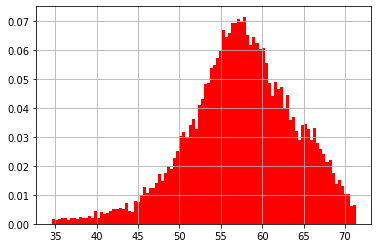

Размер общей концентрации веществ золота, серебра, свинца, золи после флотации


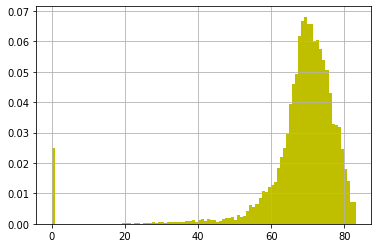

Размер общей концентрации веществ золота, серебра, свинца, золи после первичной очистки


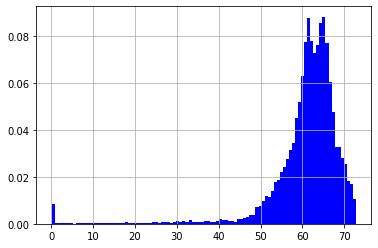

Размер общей концентрации веществ золота, серебра, свинца, золи после вторичной очистки


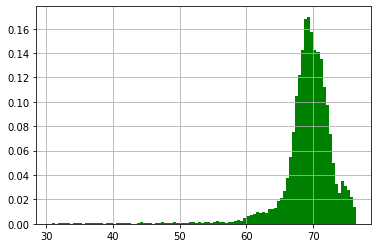

*данные показаны с квантиля 0.01 до 0.99


In [11]:
df_full['before_rougher'] = df_full['rougher.input.feed_au'] + df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_sol']
df_full['after_rougher'] = df_full['rougher.output.concentrate_au'] + df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol']
df_full['primary_cleaner'] = df_full['primary_cleaner.output.concentrate_au'] + df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_pb']  + df_full['primary_cleaner.output.concentrate_sol']
df_full['final'] = df_full['final.output.concentrate_au'] + df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol']
print('Размер общей концентрации веществ золота, серебра, свинца, золи в сырье')
df_full['before_rougher'].hist( range = (df_full['before_rougher'].quantile(.01), df_full['before_rougher'].quantile(.99)), bins = 100, density = True,color = 'r')
plt.show()
print('Размер общей концентрации веществ золота, серебра, свинца, золи после флотации')
df_full['after_rougher'].hist( range = (df_full['after_rougher'].quantile(.01), df_full['after_rougher'].quantile(.99)), bins = 100, density = True,color = 'y')
plt.show()
print('Размер общей концентрации веществ золота, серебра, свинца, золи после первичной очистки')
df_full['primary_cleaner'].hist( range = (df_full['primary_cleaner'].quantile(.01), df_full['primary_cleaner'].quantile(.99)), bins = 100, density = True,color = 'b')
plt.show()
print('Размер общей концентрации веществ золота, серебра, свинца, золи после вторичной очистки')
df_full['final'].hist( range = (df_full['final'].quantile(.01), df_full['final'].quantile(.99)), bins = 100, density = True,color = 'g')
plt.show()
print('*данные показаны с квантиля 0.01 до 0.99')

Графики общей концетрации веществ показывают нормальное распределение с тенденцией к концетрации вещества в районе 70, что ожидаемо при очистке.

## Модель

In [12]:
def sMAPE(true,pred):#создаем функцию для расчета smape, фунция принимает целевые значения и предсказания модели.
    error = np.mean(abs(true - pred)/((abs(true)+abs(pred))/2))*100
    return error
def final_sMAPE(sMAPE_rougher, sMAPE_final):#создаем функцию для расчета финального smape, фунция принимает  значения smape для прарметров rougher и final
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [13]:
features = df_train.drop(columns = ['date'], axis=1)
features = features.drop(miss_columns, axis=1)
target = df_train.loc[:, ['final.output.recovery', 'rougher.output.recovery']]
features_train, features_valid, target_train, target_valid = train_test_split(features,target, test_size = 0.25,
                                                                                                random_state = 12345)
target_train_rougher = target_train['rougher.output.recovery']
target_train_final = target_train['final.output.recovery']
target_valid_rougher = target_valid['rougher.output.recovery']
target_valid_final = target_valid['final.output.recovery']
targets_to_join = df_full[['date', 'final.output.recovery', 'rougher.output.recovery']].copy()
test = df_test.join(targets_to_join.set_index('date'), on='date')
target_test_rougher = test['rougher.output.recovery']
target_test_final = test['final.output.recovery']
features_test = test.drop(columns = ['date', 'final.output.recovery', 'rougher.output.recovery'], axis = 1)

In [14]:
target_test_rougher, target_test_final

(0       89.993421
 1       88.089657
 2       88.412756
 3       87.360133
 4       83.236367
           ...    
 5285    95.172585
 5286    94.575036
 5287    93.018138
 5288    92.599042
 5289    91.177695
 Name: rougher.output.recovery, Length: 5290, dtype: float64,
 0       70.273583
 1       68.910432
 2       68.143213
 3       67.776393
 4       61.467078
           ...    
 5285    68.919891
 5286    68.440582
 5287    67.092759
 5288    68.061186
 5289    71.699976
 Name: final.output.recovery, Length: 5290, dtype: float64)

In [ ]:
best_model = None
best_result = 1000
for depth in range(1,21):
    model1 = DecisionTreeRegressor(max_depth = depth, random_state = 12345)#проводим обучение модели рандмоного леса
    model1.fit(features_train, target_train_rougher)
    pred1 = model.predict(features_valid)
    result_rougher1 = sMAPE(target_valid_rougher,pred1)
    model1.fit(features_train, target_train_final)
    pred1 = model1.predict(features_valid)
    result_final1 = sMAPE(target_valid_final, pred1)
    result1 = final_sMAPE(result_rougher1, result_final1)
    if result1 < best_result:
        best_result = result1
        best_model = model1
print('Лучшая модель дерева решений:', best_model, '\nРезультат sMAPE:', best_result)
scores = cross_val_score(best_model, features_train, target_train_rougher, cv=5) 
final_score = pd.Series(scores).mean()
print('Результат кросс-валидации для параметра rougher:',final_score)
scores = cross_val_score(best_model, features_train, target_train_final, cv=5) 
final_score = pd.Series(scores).mean()
print('Результат кросс-валидации для параметра final:',final_score)

In [ ]:
%%time
best_model = RandomForestRegressor(max_depth=20, n_estimators=91, random_state=12345) 
scores = cross_val_score(best_model, features_train, target_train_rougher, cv=5) 
final_score = pd.Series(scores).mean()
print('Результат кросс-валидации для параметра rougher:',final_score)
scores = cross_val_score(best_model, features_train, target_train_final, cv=5) 
final_score = pd.Series(scores).mean()
print('Результат кросс-валидации для параметра final:',final_score)
best_model.fit(features_train, target_train_rougher)
pred = best_model.predict(features_valid)
result_rougher = sMAPE(target_valid_rougher,pred)
best_model.fit(features_train, target_train_final)
pred = best_model.predict(features_valid)
result_final = sMAPE(target_valid_final, pred)
result = final_sMAPE(result_rougher, result_final)
print('Результат smape для лучшей модели рандомного леса:', result)

In [15]:
random_state = 12345
cv = 5
models = [DecisionTreeRegressor(random_state = random_state), 
          RandomForestRegressor(random_state=random_state), 
          LinearRegression()]


results_cross_val = []

for model in models: 
    
    scorer = make_scorer(sMAPE, greater_is_better=False) 
    
    cross_val_score_rougher = cross_val_score(model, 
                                              features_train, 
                                              target_train_rougher, 
                                              cv=cv, scoring=scorer).mean()
    cross_val_score_final = cross_val_score(model, 
                                            features_train, 
                                            target_train_final, 
                                            cv=cv, scoring=scorer).mean()

    results_cross_val.append({'model_name': model.__class__.__name__, 
                              'cross_val_score_rougher': cross_val_score_rougher, 
                              'cross_val_score_final': cross_val_score_final}) 
              
res = pd.DataFrame(results_cross_val)
res

,model_name,cross_val_score_rougher,cross_val_score_final
0,DecisionTreeRegressor,-8.130156,-10.063145
1,RandomForestRegressor,-7.851703,-7.488172
2,LinearRegression,-9.717144,-9.246919


In [16]:
print('Результаты final sMAPE:')
for i in range(len(res)):
    print(res['model_name'][i], final_sMAPE(res['cross_val_score_rougher'][i], res['cross_val_score_final'][i]))

Результаты final sMAPE:
DecisionTreeRegressor -9.579897792712694
RandomForestRegressor -7.579055185005817
LinearRegression -9.364474919729004


Были обучены модели на основе линейной регрессии, дерева решений и рандомного леса. У дерева решений и линейной регрессии результаты оказались значительно хуже, чем у рандомного леса. 

In [21]:
%%time
best_model = None
best_result = 1000
for est in range(1,101,10):
    for depth in range(1,21):
        model = RandomForestRegressor(n_estimators = est, max_depth = depth, random_state = 12345)#проводим обучение модели рандмоного леса
        model.fit(features_train, target_train_rougher)
        pred = model.predict(features_valid)
        result_rougher = sMAPE(target_valid_rougher,pred)
        model.fit(features_train, target_train_final)
        pred = model.predict(features_valid)
        result_final = sMAPE(target_valid_final, pred)
        result = final_sMAPE(result_rougher, result_final)
        if result < best_result:
            best_result = result
            best_model = model
print('Лучшая модель рандомного леса:', best_model, '\nРезультат sMAPE:', best_result)

Лучшая модель рандомного леса: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=1,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=51,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False) 
Результат sMAPE: 10.161924854955068
CPU times: user 14.8 s, sys: 8.01 ms, total: 14.8 s
Wall time: 14.8 s


In [18]:
best_model.fit(features_train, target_train_rougher)
pred = best_model.predict(features_test)
result_rougher = sMAPE(target_test_rougher,pred)
best_model.fit(features_train, target_train_final)
pred = best_model.predict(features_test)
result_final = sMAPE(target_test_final, pred)
result = final_sMAPE(result_rougher, result_final)
print('Результат smape для лучшей модели рандомного леса на тестовой выборке:', result)

Результат smape для лучшей модели рандомного леса на тестовой выборке: 10.848378143537587


In [19]:
for i in ['mean', 'median']:#посмотрим результаты sMAPE для дамми-модели
    dummy_model = DummyRegressor(strategy = i)
    dummy_model.fit(features_train, target_train_rougher)
    pred = dummy_model.predict(features_test)
    result_rougher = sMAPE(target_test_rougher,pred)
    dummy_model.fit(features_train, target_train_final)
    pred = dummy_model.predict(features_test)
    result_final = sMAPE(target_test_final, pred)
    result = final_sMAPE(result_rougher, result_final)
    print('Значение final sMAPE для DummyRegressor с параметром:', i, result)


Значение final sMAPE для DummyRegressor с параметром: mean 10.303111617667632
Значение final sMAPE для DummyRegressor с параметром: median 9.487425461757168


Проведено сравнение модели с дамми моделью, результаты обученной модели уступают результатам заполнения медианным и средним значениеми. 